# Comparison between Neo4j and Networkx

This notebook aims to compare some algorithms implemented in both Neo4j Graph Data Science and Python's package Networkx.
I used the database from https://github.com/mathbeveridge/asoiaf corresponding to interactions between the characters of the books of the saga Song of Ice and Fire by G.R.R Martin.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
"""for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
table=pd.read_csv('/kaggle/input/song-of-ice-and-networks/data/asoiaf-all-edges.csv')

In [3]:
import networkx as nx
G=nx.Graph(name="Game of Networks")
n=len(table['Source'])
for i in range(n):
    G.add_edge(table['Source'][i],table['Target'][i],weight=table['weight'][i])



(-1.0954891204833985,
 1.0052715301513673,
 -0.854255560040474,
 0.9569045931100846)

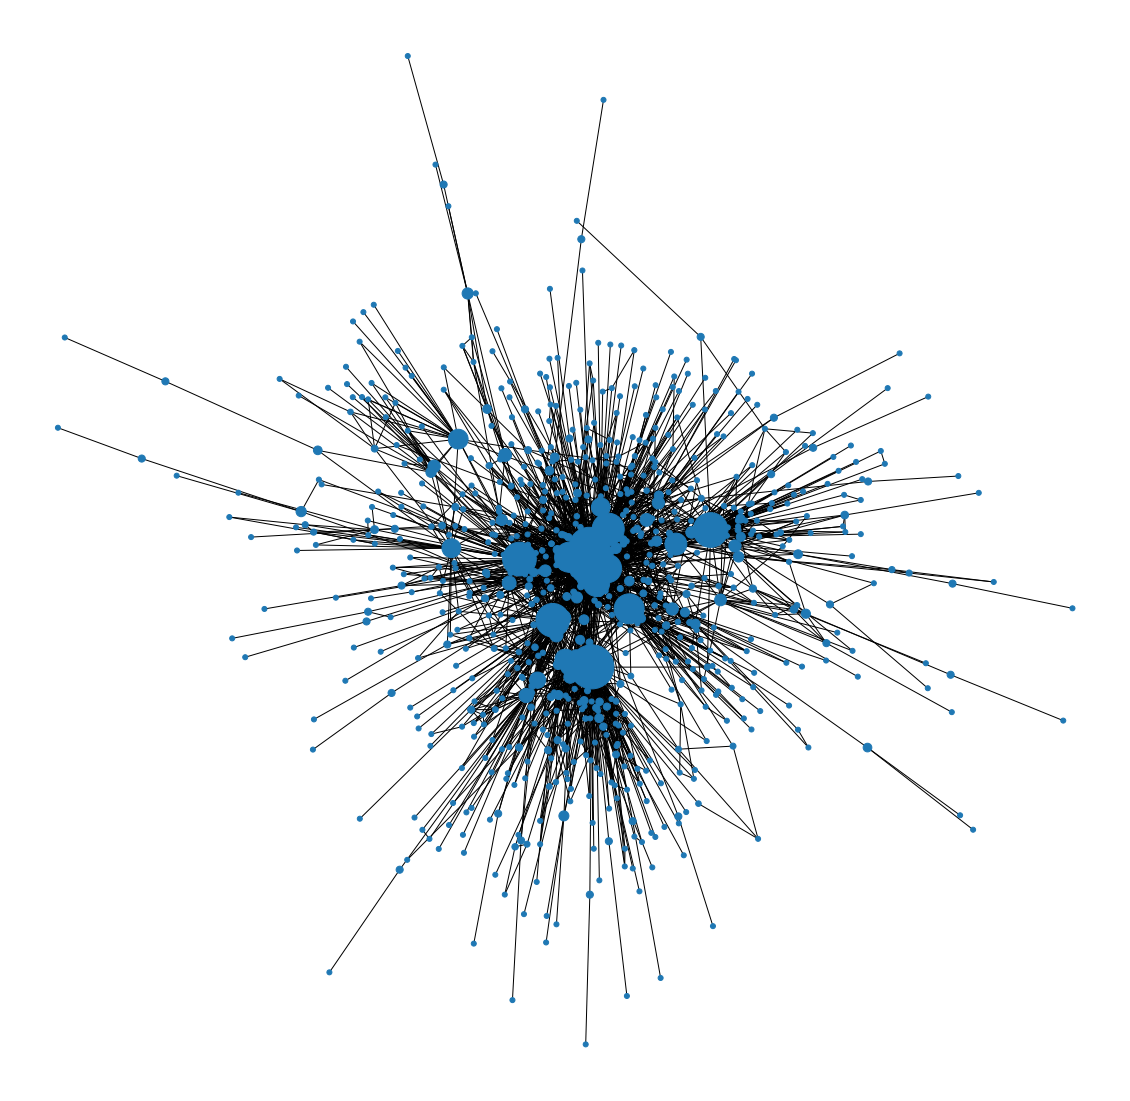

In [4]:
import matplotlib.pyplot as plt
cent=nx.betweenness_centrality(G,normalized=True,endpoints=True)
node_size=[v*10000 for v in cent.values()]
plt.figure(figsize=(20,20))
pos=nx.spring_layout(G)
nx.draw_networkx(G, pos=pos, with_labels=False, node_size=node_size )
plt.axis('off') 

## First tests
In order to compare networkx and Neo4j, I chose to compare the different implemantion of Betweenness centrality, Page Rank, Label Propagation, BFS and MST.
### Betweenness Centrality



In [5]:
from time import *

In [6]:
liste=[]
for i in range(10):
    a=time()
    nx.betweenness_centrality(G)
    b=time()
    liste.append(b-a)
print(sum(liste)/10)
print(liste)

4.868445420265198
[4.7662928104400635, 4.882371425628662, 4.75436544418335, 4.830921649932861, 4.7731828689575195, 4.834772825241089, 4.936901569366455, 5.21791410446167, 4.83636212348938, 4.851369380950928]


### PageRank

In [7]:
liste=[]
for i in range(10):
    a=time()
    nx.pagerank(G,alpha=0.85,max_iter=20)
    b=time()
    liste.append(b-a)
print(sum(liste)/10)
print(liste)


0.43345777988433837
[0.4242584705352783, 0.43897151947021484, 0.42465686798095703, 0.4274020195007324, 0.4249391555786133, 0.42038583755493164, 0.4225020408630371, 0.42548322677612305, 0.4230926036834717, 0.5028860569000244]


### Label Propagation

In [8]:

liste=[]
for i in range(100):
    a=time()
    c=nx.algorithms.community.label_propagation.label_propagation_communities(G)
    b=time() 
    liste.append(b-a)
print(sum(liste)/100)
print(liste)


3.268718719482422e-06
[1.71661376953125e-05, 4.76837158203125e-06, 3.337860107421875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 2.6226043701171875e-06, 2.86102294921875e-06, 2.6226043701171875e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 2.6226043701171875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 2.86102294921875e-06, 3.0994415283203125e-06, 3.0994415283203125e-06, 2.86102294921875e-06, 2.86102294921875


### Minimum Spanning Tree


In [9]:


liste=[]
for i in range(10):
    a=time()
    nx.minimum_spanning_tree(G)
    b=time() 
    liste.append(b-a)
print(sum(liste)/10)
print(liste)
 

0.027535414695739745
[0.02876591682434082, 0.027571916580200195, 0.027190208435058594, 0.027155399322509766, 0.027343034744262695, 0.027358055114746094, 0.02762126922607422, 0.027492046356201172, 0.02728891372680664, 0.027567386627197266]


### BFS

In [10]:
liste=[]
for i in range(100):
    a=time()
    t= nx.bfs_edges(G,"Jon-Snow",depth_limit=5)
    b=time() 
    liste.append(b-a)
print(sum(liste)/100)
print(liste)

7.581710815429688e-07
[4.0531158447265625e-06, 2.1457672119140625e-06, 9.5367431640625e-07, 7.152557373046875e-07, 4.76837158203125e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 1.1920928955078125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 7.152557373046875e-07, 7.152557373046875e-07, 7.152557373046875e-07, 9.5367431640625e-07, 4.76837158203125e-07, 4.7683

## Tests Neo4j (ms)
This test were not really automated because I want to passe through the cache memory. Therefore I had to restart the server between each test. That is why there not has much data as networkx. Therefore I think this is enough to have a decent overview of the capacity of each one.

### Code used:
#### Graph in memory
```
CALL gds.graph.create.cypher(
    'G',
    'MATCH (n) RETURN id(n) AS id',
    'MATCH (a)-[]-(b) RETURN id(a) AS source, id(b) AS target'
)
YIELD graphName, nodeCount, relationshipCount, createMillis;
```

#### betweenness centrality
```
 CALL gds.alpha.betweenness.stream({
nodeQuery: 'MATCH (p) RETURN id(p) AS id',
  relationshipQuery: 'MATCH (p1)-[]-(p2) RETURN id(p1) AS source, id(p2) AS target'
})
YIELD nodeId,centrality
return gds.util.asNode(nodeId).name as user,centrality
order by centrality DESC limit 1
```
#### page rank
```
CALL gds.pageRank.stream('G',{maxIterations:20, dampingFactor:0.85})
YIELD nodeId, score
RETURN gds.util.asNode(nodeId).name AS name, score
ORDER BY score DESC, name ASC limit 1
```

####  Label Propagation
```
CALL gds.labelPropagation.stream('G'})
YIELD nodeId, communityId AS Community
RETURN gds.util.asNode(nodeId).name AS Name, Community
ORDER BY Community, Name limit 1 
```

#### BFS
```
MATCH (a:Character{name:'Jon Snow'})
WITH id(a) AS startNode
CALL gds.alpha.bfs.stream('G', {startNode: startNode,maxDepth :5})
YIELD path
UNWIND [ n in nodes(path) | n.name] AS name
RETURN name
ORDER BY name limit 1
```

#### MST
```
MATCH (n:Character {name: 'Jon Snow'})
CALL gds.alpha.spanningTree.minimum.write({
  nodeProjection: 'Character',
  relationshipProjection: {
  	Interacts: {
    	type :'Interacts',
   	 	properties: 'weight',
    	orientation: 'UNDIRECTED'
    	}
    },
    startNodeId: id(n),
    relationshipWeightProperty: 'weight',
    writeProperty: 'MINST',
    weightWriteProperty: 'writeCost'
})
YIELD createMillis, computeMillis, writeMillis, effectiveNodeCount
RETURN createMillis, computeMillis, writeMillis, effectiveNodeCount;
```

### Raw results: 
betweenness #1 (ms) : 354,90,67,76,59,85,55,61,84,58,69

page rank #1 (ms) : 327,202,166, crash

betweenness #2 (ms) : 288,95,85,61,65,69,68,69

page rank #2 (ms) : 294,191,146

page rank #3 (ms) : 451, 241, 154,

label propagation #1 (ms) : 230, 89,88,68,47,62,47,43,47

label propagation #2 (ms) : 120, 62,51,33,27,38,30

label propagation #3 (ms) : 170, 74, 64,79,44,49,47,46,67,

BFS (graph in memory) : environ 37;38,7;38,5 seconds for  max depth=5

MST :454,42 

MST(with graph projection during the algo) : , 1100, 1255,

MST (others first iterations) :488,483, 583,

MST:  620,66,57,53,60,46

## Synthesis
Algorithm | Time Neo4j (s) | Time Networkx(s)
:-: | :-: | :-:
Betweenness centrality | 0,32 (0,08 after) | 4,9
Page rank | 0,36 (0,1 after) | 0,43 
Label Propagation | 0,17 (0,05 after) | 1e-6  (1e-5 for the first one)
Breadth First Search | 38 | 7e-7 (2e-6 for the 2 first ones)
Minimum spanning tree | 0,52 (0,06 after)| 0,03 




## Conclusion

It is hard to have a clear decision because there is huge gap for either software. Most of the time Networkx is far better than neo4j. But is some case (Betweenness and Page rank) Neo4j is better and getting even better after the first iteration due to the use of a cache. 
However, there is a huge gap between Neo4j and Network regarding to BFS's algorithm (1e8 order of magnitude...)
